## Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import the Dataset

In [3]:
df = pd.read_csv('Facebook_Ads_2.csv',encoding = 'ISO-8859-1')

In [4]:
df.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [5]:
df.tail()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,32.386148,74331.35442,1


## Explore and Visualise the dataset

In [6]:
total = len(df)
clicked = len(df[df['Clicked']==1])
noclick = total - clicked

In [8]:
print('Total = ',total)
print('No. of customers who clicked the Ad = ',clicked)
print('Percentage Clicked = ',(clicked/total)*100,'%')
print('No. of customers who did not click the Ad = ',noclick)
print('Percentage Not Clicked = ',(noclick/total)*100,'%')

Total =  499
No. of customers who clicked the Ad =  250
Percentage Clicked =  50.1002004008016 %
No. of customers who did not click the Ad =  249
Percentage Not Clicked =  49.899799599198396 %


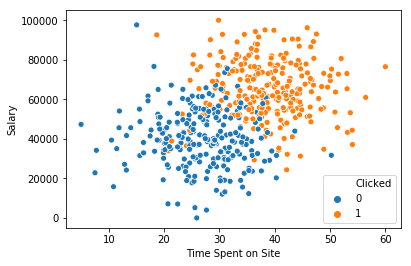

In [9]:
sns.scatterplot(df['Time Spent on Site'],df['Salary'],hue=df['Clicked'])

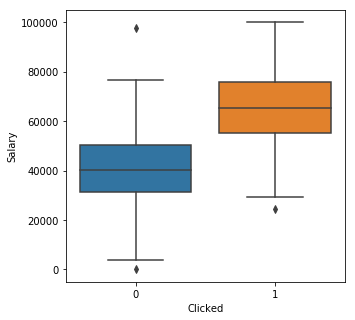

In [10]:
plt.figure(figsize=[5,5])
sns.boxplot(x='Clicked',y='Salary',data = df)

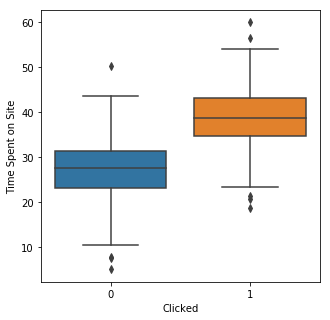

In [11]:
plt.figure(figsize=[5,5])
sns.boxplot(x='Clicked',y='Time Spent on Site',data = df)

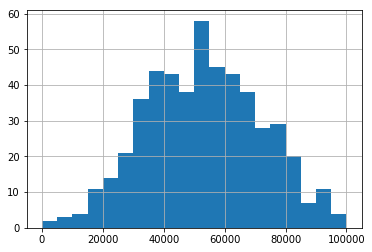

In [12]:
df['Salary'].hist(bins=20)

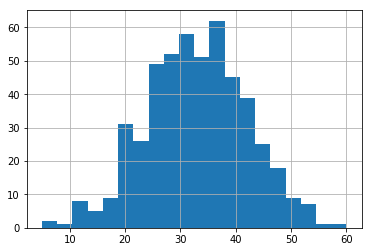

In [13]:
df['Time Spent on Site'].hist(bins=20)

## Data Cleaning

In [15]:
# Dropping the email, country and names columns
df.drop(['Names','emails','Country'],axis = 1,inplace = True)

In [16]:
df.head()

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0


In [17]:
X = df.drop('Clicked',axis = 1).values
y = df['Clicked'].values

In [20]:
X.shape

(499, 2)

In [21]:
y.shape

(499,)

In [22]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

## Training the Model

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)

In [25]:
X_train.shape

(399, 2)

In [26]:
X_test.shape

(100, 2)

In [30]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
## Training predictions

In [28]:
y_pred_train = classifier.predict(X_train)

In [29]:
y_pred_train

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,

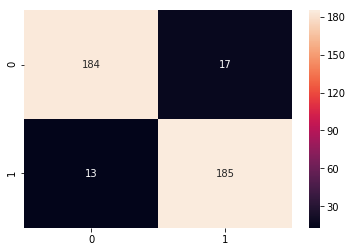

In [36]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_train,y_pred_train)
sns.heatmap(cm,annot=True,fmt='d')

In [37]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       201
           1       0.92      0.93      0.93       198

   micro avg       0.92      0.92      0.92       399
   macro avg       0.92      0.92      0.92       399
weighted avg       0.92      0.92      0.92       399



In [32]:
## Test Predictions

In [34]:
y_pred_test = classifier.predict(X_test)

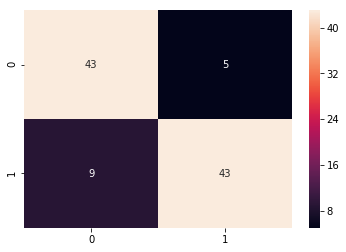

In [35]:
cm_test = confusion_matrix(y_test,y_pred_test)
sns.heatmap(cm_test,annot=True,fmt='d')

In [38]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        48
           1       0.90      0.83      0.86        52

   micro avg       0.86      0.86      0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100

